C:\Users\ernan\AppData\Local\Temp\ipykernel_36544\3516035474.py:53: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if neighbors:  # If there are empty neighbors


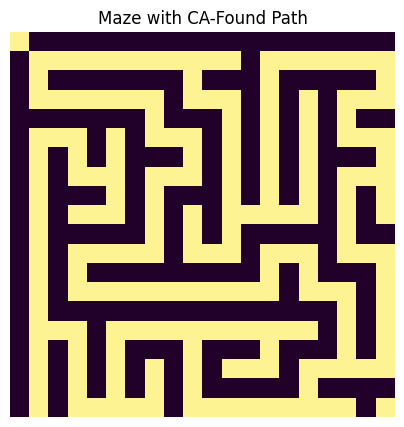

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def create_maze(size):
  """
  Creates a simple maze using a random maze generation algorithm.

  Args:
    size: The size of the maze (square).

  Returns:
    A 2D numpy array representing the maze.
    0: Path
    1: Wall
  """
  maze = np.ones((size, size))  # Initialize with all walls
  maze[0, 0] = 0  # Set start point
  maze[size-1, size-1] = 0  # Set end point

  def carve_passages(x, y):
    directions = [(0, 1), (0, -1), (1, 0), (-1, 0)]  # Right, Left, Down, Up
    np.random.shuffle(directions)
    for dx, dy in directions:
      nx, ny = x + 2*dx, y + 2*dy
      if 0 <= nx < size and 0 <= ny < size and maze[nx, ny] == 1:
        maze[x+dx, y+dy] = 0
        maze[nx, ny] = 0
        carve_passages(nx, ny)

  carve_passages(1, 1)  # Start carving from a random point near the start
  return maze

def find_path(maze):
  """
  Finds a path through the maze using a simple CA.

  Args:
    maze: A 2D numpy array representing the maze.

  Returns:
    A 2D numpy array representing the path.
  """
  path = maze.copy()  # Initialize path with maze layout
  path[path == 0] = 2  # Mark initial path as 2

  while True:
    new_path = path.copy()
    for i in range(1, path.shape[0]-1):
      for j in range(1, path.shape[1]-1):
        if path[i, j] == 2:  # If it's part of the current path
          neighbors = path[i-1:i+2, j-1:j+2].flatten()
          neighbors = neighbors[neighbors == 0]  # Find neighboring empty cells
          if neighbors:  # If there are empty neighbors
            new_path[i, j] = 0  # Remove from current path
            new_path[np.random.choice(neighbors)] = 2  # Move to a random neighbor
    path = new_path

    # Check if the goal is reached
    if path[path.shape[0]-1, path.shape[1]-1] == 2:
      break

  return path

# Generate a maze
maze_size = 20
maze = create_maze(maze_size)

# Find the path
path = find_path(maze)

# Visualize the maze and path
plt.figure(figsize=(5, 5))
plt.imshow(maze, cmap='binary', interpolation='nearest')
plt.imshow(path, cmap='viridis', alpha=0.5, interpolation='nearest')
plt.title("Maze with CA-Found Path")
plt.axis('off')
plt.show()